In [2]:

# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import zipfile

zip_path="/content/drive/MyDrive/80-20.zip"

with zipfile.ZipFile(zip_path,'r') as zip_ref:
  zip_ref.extractall("/content/drive/MyDrive/dataset80")

In [3]:
import os
os.listdir("/content/drive/MyDrive/dataset80")

['80-20']

In [6]:
# Set paths
train_path = '/content/drive/MyDrive/dataset80/80-20/train'
test_path = '/content/drive/MyDrive/dataset80/80-20/test'

In [7]:
# Classes
class_names = sorted(os.listdir(train_path))
num_classes = len(class_names)
print("Classes:", class_names)

Classes: ['Dolphin', 'Fish', 'Jelly Fish', 'Octopus', 'Penguin', 'Sea Rays', 'Sea Urchins', 'Seahorse', 'Sharks', 'Starfish', 'Turtle_Tortoise', 'Whale', 'crab']


In [4]:
# Import libraries
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import Xception
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from tensorflow.keras.optimizers import Adam

In [8]:
# ImageDataGenerators
image_size = (299, 299)  # Xception default input size
batch_size = 32

train_datagen = ImageDataGenerator(rescale=1./255, rotation_range=20, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

train_gen = train_datagen.flow_from_directory(
    train_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=True
)

test_gen = test_datagen.flow_from_directory(
    test_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='sparse',
    shuffle=False
)

Found 4080 images belonging to 13 classes.
Found 1120 images belonging to 13 classes.


In [9]:
# Build model using Xception
base_model = Xception(include_top=False, weights='imagenet', input_shape=(299, 299, 3))
base_model.trainable = False  # Freeze base model

model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dense(256, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

# Compile model
model.compile(optimizer=Adam(learning_rate=0.0001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.summary()


83683744/83683744 ━━━━━━━━━━━━━━━━━━━━ 3s 0us/step


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ xception (Functional)           │ (None, 10, 10, 2048)   │    20,861,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 2048)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │       524,544 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 13)             │         3,341 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 21,389,365 (81.59 MB)

 Trainable params: 527,885 (2.01 MB)

 Non-trainable params: 20,861,480 (79.58 MB)

In [11]:

# Callbacks
model_name = "/content/drive/MyDrive/xception_trained.h5"
callbacks = [
    EarlyStopping(patience=3, restore_best_weights=True),
    ModelCheckpoint(model_name, save_best_only=True)
]

# Train the model
history = model.fit(train_gen, epochs=30, callbacks=callbacks)

Epoch 1/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 2137s 17s/step - accuracy: 0.4863 - loss: 1.9698
Epoch 2/30


/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/early_stopping.py:153: UserWarning: Early stopping conditioned on metric `val_loss` which is not available. Available metrics are: accuracy,loss
  current = self.get_monitor_value(logs)
/usr/local/lib/python3.11/dist-packages/keras/src/callbacks/model_checkpoint.py:209: UserWarning: Can save best model only with val_loss available, skipping.
  self._save_model(epoch=epoch, batch=None, logs=logs)


128/128 ━━━━━━━━━━━━━━━━━━━━ 109s 849ms/step - accuracy: 0.8232 - loss: 0.7031
Epoch 3/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 108s 840ms/step - accuracy: 0.8426 - loss: 0.5233
Epoch 4/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 109s 849ms/step - accuracy: 0.8794 - loss: 0.4169
Epoch 5/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 142s 857ms/step - accuracy: 0.8934 - loss: 0.3668
Epoch 6/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 108s 841ms/step - accuracy: 0.8941 - loss: 0.3549
Epoch 7/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 144s 862ms/step - accuracy: 0.8984 - loss: 0.3371
Epoch 8/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 139s 843ms/step - accuracy: 0.8969 - loss: 0.3235
Epoch 9/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 836ms/step - accuracy: 0.9049 - loss: 0.2958
Epoch 10/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 835ms/step - accuracy: 0.9140 - loss: 0.2813
Epoch 11/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 833ms/step - accuracy: 0.9054 - loss: 0.2957
Epoch 12/30
128/128 ━━━━━━━━━━━━━━━━━━━━ 107s 835ms/step - accuracy: 0.9249 - loss: 0.2440
Epoch 13/30
128/12

In [12]:

# Evaluate model
loss, accuracy = model.evaluate(test_gen)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 598s 17s/step - accuracy: 0.8640 - loss: 0.4669
Test Accuracy: 86.16%


In [15]:
# Evaluate model
test_loss, test_accuracy = model.evaluate(test_gen)
print(f"\n✅ Final Test Accuracy: {test_accuracy * 100:.2f}% | Test Loss: {test_loss:.4f}")

# Get final training accuracy from history
train_accuracy = history.history['accuracy'][-1]
print(f"✅ Final Training Accuracy: {train_accuracy * 100:.2f}%")

35/35 ━━━━━━━━━━━━━━━━━━━━ 9s 243ms/step - accuracy: 0.8640 - loss: 0.4669

✅ Final Test Accuracy: 86.16% | Test Loss: 0.4697
✅ Final Training Accuracy: 95.20%



🔍 Predicting test data for evaluation...
35/35 ━━━━━━━━━━━━━━━━━━━━ 12s 267ms/step

📊 Classification Report:
                 precision    recall  f1-score   support

        Dolphin     0.8462    0.9625    0.9006        80
           Fish     0.8049    0.8250    0.8148        80
     Jelly Fish     0.9429    0.8250    0.8800        80
        Octopus     0.6818    0.7500    0.7143        80
        Penguin     0.9358    0.8500    0.8908       120
       Sea Rays     0.8417    0.8417    0.8417       120
    Sea Urchins     1.0000    0.7875    0.8811        80
       Seahorse     0.7500    0.9000    0.8182        80
         Sharks     0.7683    0.7875    0.7778        80
       Starfish     0.9512    0.9750    0.9630        80
Turtle_Tortoise     0.9506    0.9625    0.9565        80
          Whale     0.8026    0.7625    0.7821        80
           crab     0.9875    0.9875    0.9875        80

       accuracy                         0.8616      1120
      macro avg     0.8664    0.8

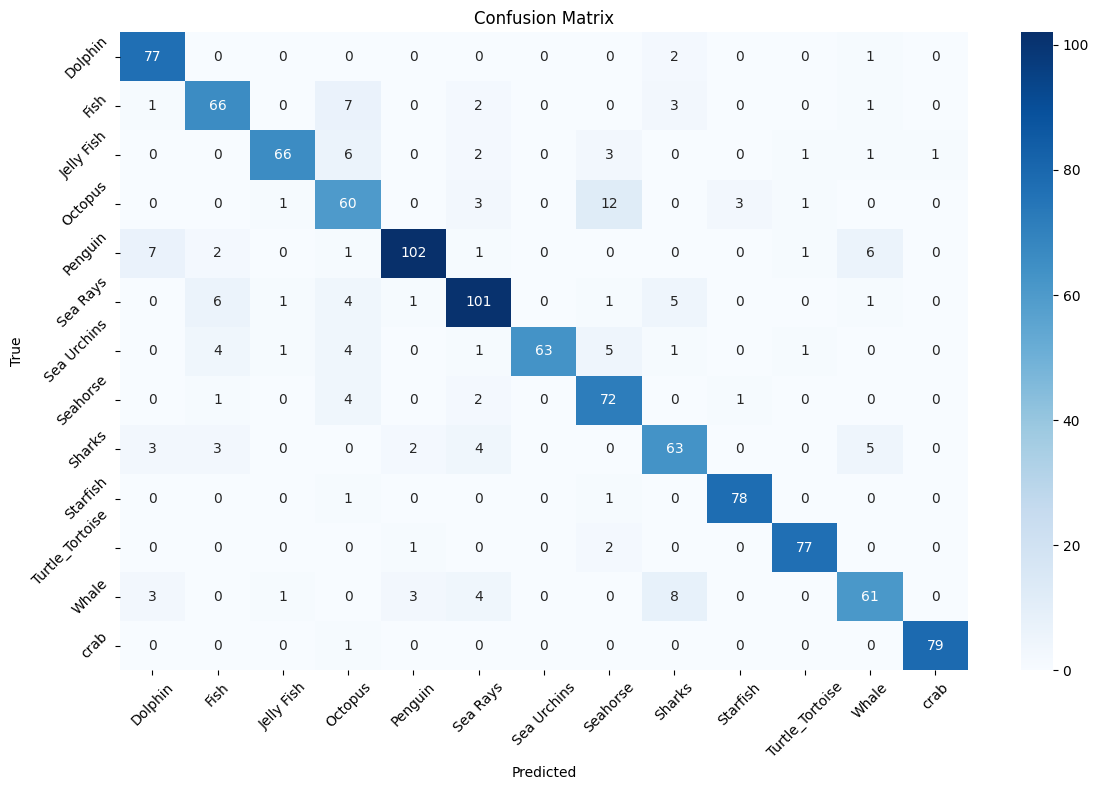

In [17]:
# Classification Report & Confusion Matrix
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

print("\n🔍 Predicting test data for evaluation...")
y_true = test_gen.classes
y_probs = model.predict(test_gen)
y_pred = np.argmax(y_probs, axis=1)

print("\n📊 Classification Report:")
report = classification_report(y_true, y_pred, target_names=class_names, digits=4)
print(report)

print("\n📉 Confusion Matrix:")
cm = confusion_matrix(y_true, y_pred)
plt.figure(figsize=(12, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.xticks(rotation=45)
plt.yticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
# Save model
model.save('/content/drive/MyDrive/Xception_model80ft.h5')

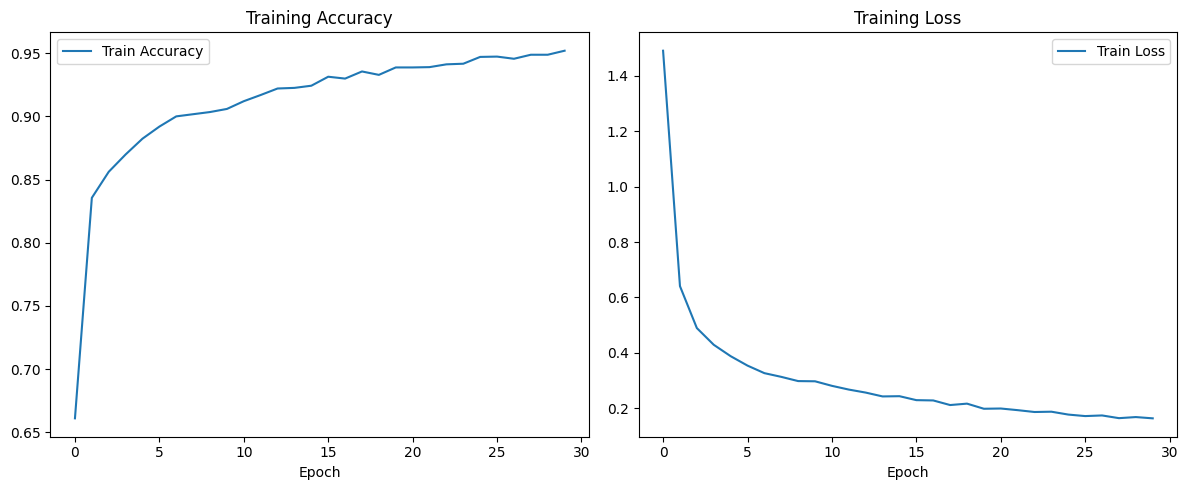

In [19]:
# Plot training accuracy and loss
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.title("Training Accuracy")
plt.xlabel("Epoch")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.title("Training Loss")
plt.xlabel("Epoch")
plt.legend()

plt.tight_layout()
plt.show()




In [20]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

test_dir = "//content/drive/MyDrive/dataset80/80-20/test"  # Update if path is different
image_size = (299, 299)  # Same size as in model input

test_datagen = ImageDataGenerator(rescale=1./255)
test_gen = test_datagen.flow_from_directory(
    test_dir,
    target_size=image_size,
    batch_size=32,
    class_mode='categorical',
    shuffle=False
)

class_names = list(test_gen.class_indices.keys())

Found 1120 images belonging to 13 classes.


In [22]:
# Prediction visualization
def show_predictions(data, model, class_names, grid=(4, 5), size=(15, 12)):
    images, labels = next(iter(data))
    plt.figure(figsize=size)
    for i in range(min(grid[0] * grid[1], len(images))):
        img = images[i]
        true = np.argmax(labels[i])  # Fix: Convert one-hot encoded label to integer index
        pred = np.argmax(model.predict(img[np.newaxis, ...], verbose=0))
        plt.subplot(grid[0], grid[1], i+1)
        plt.imshow(img)
        plt.title(f"True: {class_names[true]}\nPred: {class_names[pred]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

# Show predictions
show_predictions(test_gen, model, class_names)

Output hidden; open in https://colab.research.google.com to view.

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step


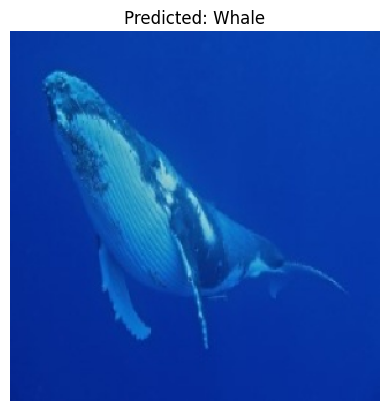

✅ Predicted class: Whale


'Whale'

In [25]:
import numpy as np
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import os
from tensorflow.keras.models import load_model

# === Load model ===
model = load_model("/content/drive/MyDrive/Xception_model80ft.h5")

# === Load class names (alphabetical, must match training) ===
class_names = sorted(os.listdir('/content/drive/MyDrive/dataset80/80-20/train'))

# === Load and preprocess image ===
def load_and_preprocess_image(img_path, target_size=(299, 299)):
    img = image.load_img(img_path, target_size=target_size)
    img_array = image.img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    return img, img_array

# === Predict ===
def predict_single_image(img_path):
    img, img_array = load_and_preprocess_image(img_path)
    prediction = model.predict(img_array)
    predicted_class_index = np.argmax(prediction, axis=1)[0]
    predicted_class_name = class_names[predicted_class_index]

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Predicted: {predicted_class_name}")
    plt.show()

    print(f"✅ Predicted class: {predicted_class_name}")
    return predicted_class_name

# === Run prediction ===
img_path = "/content/drive/MyDrive/dataset80/80-20/test/Whale/28516650212_620512f748_o.jpg"
predict_single_image(img_path)